In [1]:
import pandas as pd
import numpy as np


IMPORTING DATASET


In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
print(df['review'][1])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


Importing REGULAR EXPRESSION library form python

In [7]:
import re

Remove HTML TAGS from review column

 The re module provides an interface to the regular expression engine, allowing you to compile REs into objects and then perform matches with them.

Compiling Regular Expressions
Regular expressions are compiled into pattern objects, which have methods for various operations such as searching for pattern matches or performing string substitutions.

In [8]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

split() : Split the string into a list, splitting it wherever the RE matches

sub()   : Find all substrings where the RE matches, and replace them with a different string

subn() : Does the same thing as sub(), but returns the new string and the number of replacements

In [9]:
df['review'] = df['review'].apply(remove_html_tags)

Removing URL'S FROM THE TEXT

In [10]:

def remove_url(text):
    temp = re.compile(r'https?://\S+|www\.\S+')
    return temp.sub('', text)

In [11]:
df['review'] = df['review'].apply(remove_url)

LOWERING THE TEXT in each row of 'review' column

In Pandas, .str is an accessor that allows you to apply string methods to each element in a Series (a one-dimensional labeled array of values). It's a way to vectorize string operations, making it efficient to perform operations on large datasets.

In [12]:
df['review'] = df['review'].str.lower()

REMOVING PUNCUATIONS

In [13]:
#method 1:
import string
exclude = string.punctuation

def remove_puncuations1(text):
    for char in exclude:
        text = text.replace(char, '')
    return text

In [14]:
#method 2:
def remove_puncuations2(text):
    return text.translate(str.maketrans('','',exclude))

In [15]:
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
demo = "Hello world! How are you?"
print(remove_puncuations1(demo))
print(remove_puncuations2(demo))

Hello world How are you
Hello world How are you


In [17]:
df['review'] = df['review'].apply(remove_puncuations2)


STOPWORDS Removal

In [18]:
from nltk.corpus import stopwords

In [19]:
words_to_remove = stopwords.words('english')

In [20]:
def stopword_removing(text):
    for w in text.split():
        if w in words_to_remove:
            text = text.replace(w, '')
    return ''.join(text)

In [21]:
print(stopword_removing("I am going to school and this is my pen with a cap"))

I  going  school     pen   cp


In [22]:
df['review'] = df['review'].apply(stopword_removing)

TOKANIZATION

Two types of tokanization are there:    1> Sentence Tokanization 2> Word Tokanization            

In [23]:
from nltk import word_tokenize

In [24]:
def tokanize(text):
    return word_tokenize(text)

In [25]:
print(tokanize("Hello there. I am practicing NLP techniques. Join me."))

['Hello', 'there', '.', 'I', 'am', 'practicing', 'NLP', 'techniques', '.', 'Join', 'me', '.']


In [26]:
df['review'] = df['review'].apply(tokanize)

Lemmitization


In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
# Assuming you have your dataframe df and your lemmatization function defined
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    # This is an example lemmatization function
    return ' '.join([lemmatizer.lemmatize(word) for word in text])

In [29]:

# Initialize an empty list to store processed chunks
chunks = []

# Process the dataframe in chunks of 10,000 rows
chunk_size = 10000
for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    chunk = df.iloc[start:end].copy()  # Copy the chunk to avoid modifying the original dataframe
    chunk['review'] = chunk['review'].apply(lemmatization)
    chunks.append(chunk)

# Concatenate the processed chunks back into a single dataframe
df_processed = pd.concat(chunks, ignore_index=True)

# Now df_processed contains the lemmatized reviews


In [30]:
df_processed.head()

,review,sentiment
0,e revewers nted wtchg 1 oz epode ll hooked y r...,positive
1,wderful ltle producti filming technique unssum...,positive
2,thought th wderful wy spend tme o hot summer w...,positive
3,bsclly re fmly lttle boy jke thks re zombe clo...,negative
4,petter mtte love time mey vully stunng film wt...,positive


Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_processed['review']
y = df_processed['sentiment']

In [33]:
X.head(1)

0    e revewers nted wtchg 1 oz epode ll hooked y r...
Name: review, dtype: object

In [34]:
y.head(1)

0    positive
Name: sentiment, dtype: object

Transforming y column in numerical colum

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
for i in range(1,11):
    print(y[i])

1
1
0
1
1
1
0
0
1
0


In [70]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df_processed['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [65]:
pos_review = []
for text in df_processed[df_processed['sentiment'] == 'positive']['review'].tolist():
    for word in text.split():
        pos_review.append(word)

In [66]:
len(pos_review)

3818063

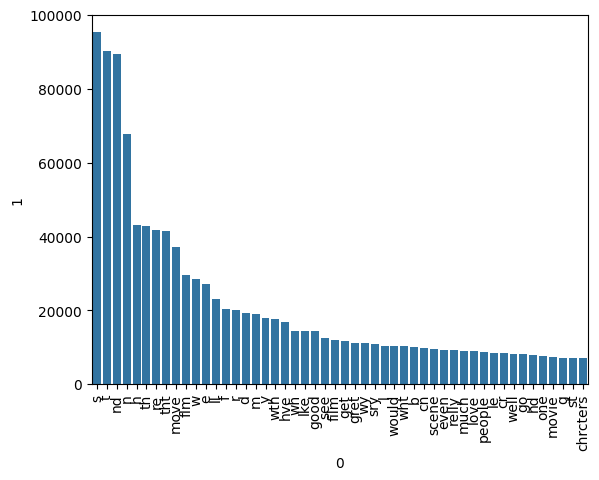

In [76]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(pos_review).most_common(50))[0] , y = pd.DataFrame(Counter(pos_review).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [77]:
neg_review = []
for text in df_processed[df_processed['sentiment'] == 'negative']['review'].tolist():
    for word in text.split():
        neg_review.append(word)

In [80]:
len(neg_review)

3768190

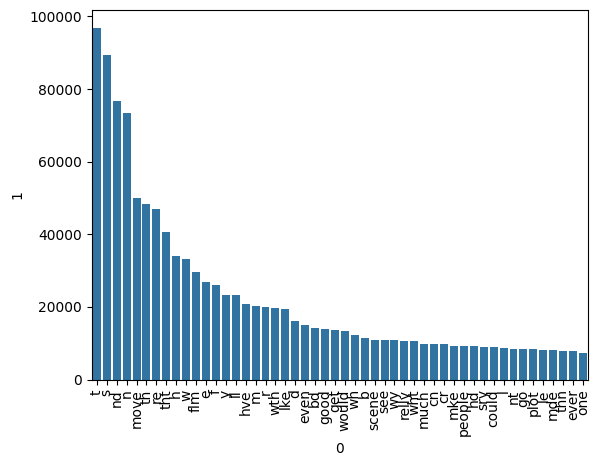

In [79]:
sns.barplot(x = pd.DataFrame(Counter(neg_review).most_common(50))[0] , y = pd.DataFrame(Counter(neg_review).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [85]:
print(len(words_to_remove))
i = 0
for w in words_to_remove:
    if i<101:
        print(w)
    else:
        break


10000
bsclly
re
fmly
lttle
boy
jke
thks
re
zombe
closet
prents
re
fghtg
ll
tmet
move
slor
thn
sop
oper
nd
suddenly
jke
decdes
become
rmbo
nd
kll
frst
ll
re
gog
mke
flm
must
decde
thrller
drm
s
drm
move
wtchble
prents
re
dvcg
rgug
lke
rel
le
nd
n
hve
jke
closet
tlly
ru
ll
flm
expected
see
boogeymn
smlr
move
nd
sted
wtched
drm
mengless
thrller
10
f
ll
plyg
prents
descent
dlogs
s
f
shot
jke
gne
m
s
mzg
fresh
novtve
de
70
frst
red
frst
7
8
yers
brll
thgs
dropped
1990
s
relly
funny
yme
d
s
ctued
s
decle
furr
complete
te
tme
dy
truly
dgrceful
fr
s
fllen
wrg
pfully
bd
perfmces
lmost
bd
f
mldly
entertg
respe
s
probbly
wouldnt
stll
r
fd
hrd
leve
cret
gl
ct
l
chose
bd
hcks
followed
c
e
recognze
brllce
d
n
see
f
replce
wh
medocry
felt
must
gve
2
strs
respect
f
gl
ct
mde
s
huge
success
s
wful
ct
leve
s
stll
r
encourged
postve
comnts
flm
lookng
wrd
wtchng
flm
bd
mstke
ve
seen
flms
s
truly
e
worst
m
t
wful
n
lmost
every
wy
edtng
pcng
srylne
ctng
undtrck
flms
ly
sg
l
country
tune
s
plyed
le
thn
four


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)

(40000,)
(10000,)


Text Vectorization

Creating features form the textual data present in the column of df['reviews']
In this experiment we will use tfidf method

In [39]:
# We will import countvectorizer  from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer


In [40]:
tv = TfidfVectorizer( max_features=5000)

In [41]:
X_train_tv = tv.fit_transform(X_train ).toarray()
X_test_tv = tv.transform(X_test).toarray()

In [42]:
print(X_train_tv.shape)
print(X_test_tv.shape)

(40000, 5000)
(10000, 5000)


# Model Training

Random Forest, Naive Bayes, Logistic Regression, Support Vecotor machines are some of the Machine learning algorithms which works for the classification tasks

We will train our data on multiple algorithms and select the one with greatest accuracy

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [93]:
lr = LogisticRegression()
rf = RandomForestClassifier()
sv = SVC()
nb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
#Logistic Regression
lr.fit(X_train_tv, y_train)
y_pred_lr = lr.predict(X_test_tv)

In [46]:
#Random Forest
rf.fit(X_train_tv, y_train)
y_pred_rf = rf.predict(X_test_tv)

In [96]:
#gnaive_bayes
nb.fit(X_train_tv, y_train)
y_pred_nb = nb.predict(X_test_tv)

In [97]:
mnb.fit(X_train_tv, y_train)
y_pred_mnb = mnb.predict(X_test_tv)

In [98]:
bnb.fit(X_train_tv, y_train)
y_pred_bnb = bnb.predict(X_test_tv)

In [100]:
print(f"Accuraccy  Lr : {(accuracy_score(y_test, y_pred_lr)*100)}")
print("confusion_matrix: ")
print(confusion_matrix(y_test, y_pred_lr))
print(f"precision_score : {precision_score(y_test, y_pred_lr)}")

Accuraccy  Lr : 87.0
confusion_matrix: 
[[4252  709]
 [ 591 4448]]
precision_score : 0.8625169672290092


In [101]:
print(f"Accuraccy socre Rf :  {(accuracy_score(y_test, y_pred_rf)*100)}")
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"precision_score : {precision_score(y_test, y_pred_rf)}")

Accuraccy socre Rf :  82.76
confusion_matrix:
[[4150  811]
 [ 913 4126]]
precision_score : 0.8357302005266356


In [103]:
print(f"Accuraccy socre NB : {(accuracy_score(y_test, y_pred_nb)*100)}")
print("confusion_matrix: ")
print(confusion_matrix(y_test, y_pred_nb))
print(f"precision_score : {precision_score(y_test, y_pred_nb)}")

Accuraccy socre NB : 79.06
confusion_matrix: 
[[3949 1012]
 [1082 3957]]
precision_score : 0.7963372912054739


In [104]:
print(f"Accuraccy socre MNB : {(accuracy_score(y_test, y_pred_mnb)*100)}")
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred_mnb))
print(f"precision_score : {precision_score(y_test, y_pred_mnb)}")

Accuraccy socre MNB : 82.92
confusion_matrix:
[[4091  870]
 [ 838 4201]]
precision_score : 0.828436205876553


In [105]:
print(f"Accuraccy socre BNB : {(accuracy_score(y_test, y_pred_bnb)*100)}")
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred_mnb))
print(f"precision_score : {precision_score(y_test, y_pred_bnb)}")

Accuraccy socre BNB : 81.35
confusion_matrix:
[[4091  870]
 [ 838 4201]]
precision_score : 0.8041395170563435
